H2.4 Support Vector Machine (SVM)
=================================


In [148]:
from sklearn.datasets import fetch_mldata
from sklearn import svm
from sklearn.model_selection import GridSearchCV
mnist = fetch_mldata('MNIST original')

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [150]:
X = mnist.data
y = mnist.target
X4 = X[y == 4, :]
X9 = X[y == 9, :]
training_X = np.concatenate((X4[:4000], X9[:4000]))
testing_X = np.concatenate((X4[4000:], X9[4000:]))
training_y = np.concatenate((np.ones(4000) * 4, np.ones(4000) * 9))
testing_y = np.concatenate((np.ones(len(X4) - 4000) * 4, np.ones(len(X9) - 4000) * 9))

In [151]:
# clf = svm.SVC(C=1.0, kernel='linear')
# clf.fit(training_X, training_y)
# Pe = 1 - clf.score(testing_X, testing_y)

In [170]:
def svc_param_selection(X, y, kernel, degree=3, nfolds=2):
    Cs = [10.**(-c) for c in range(9, -1, -1)] # C = [1e-9 to 1e0]
    gammas = [10.**(-g) for g in range(5, -1, -1)] # gamma = [1e-5 to 1e0]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(svm.SVC(kernel=kernel, degree=degree), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

### (a) Inhomogeneous linear and quadratic kernel

In [153]:
p1_params = svc_param_selection(training_X, training_y, 'poly', degree=1)
p2_params = svc_param_selection(training_X, training_y, 'poly', degree=2)
print("best C for p1: {0}".format(p1_params['C']))
clf_p1 = svm.SVC(C=p1_params['C'], kernel='poly', degree=1, probability=True)
clf_p1.fit(training_X, training_y)
Pe_1 = 1 - clf_p1.score(testing_X, testing_y)
print("p1 error rate: {0}".format(Pe_1))

print("best C for p2: {0}".format(p2_params['C']))
clf_p2 = svm.SVC(C=p2_params['C'], kernel='poly', degree=2, probability=True)
clf_p2.fit(training_X, training_y)
Pe_2 = 1 - clf_p2.score(testing_X, testing_y)
print("p2 error rate: {0}".format(Pe_2))

best C for p1: 1e-06
p1 error rate: 0.07903839501902454
best C for p2: 1e-07
p2 error rate: 0.011760636457972984


### (b) Radial basis function kernel

In [171]:
rbf_params = svc_param_selection(training_X, training_y, 'rbf')
print("best C for p1: {0}, gamma: {1}".format(rbf_params['C'], rbf_params['gamma']))
clf_rbf = svm.SVC(C=rbf_params['C'], kernel='rbf', gamma=rbf_params['gamma'], probability=True)
clf_rbf.fit(training_X, training_y)
Pe_rbf = 1 - clf_rbf.score(testing_X, testing_y)
print("rbf error rate: {0}".format(Pe_rbf))

best C for p1: 1e-09, gamma: 0.0001
rbf error rate: 0.021099965409892785


### (c) The hardest example for classification

In [179]:
def find_the_hardest_set(proba, y):
    wrongs = []
    for i in range(len(proba)):
        if proba[i, 0] > proba[i, 1]:
            if y[i] != 4.:
                wrongs.append((proba[i, 0], i))
        else:
            if y[i] != 9.:
                wrongs.append((proba[i, 1], i))
    wrongs.sort()
    wrongs.reverse()
    return wrongs

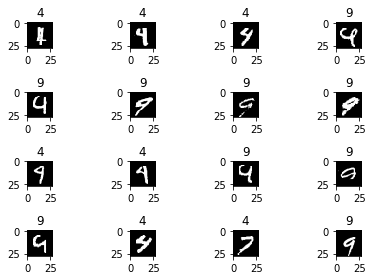

In [156]:
proba = clf_p1.predict_proba(testing_X)
wrong_set = find_the_hardest_set(proba, testing_y)
f, axarr = plt.subplots(4, 4)
plt.title("The top 16 hard examples classified by p1")
row = 0
col = 0
for i in range(16):
    axarr[row, col].imshow(testing_X[wrong_set[i][1]].reshape((28, 28)), cmap='gray')
    axarr[row, col].set_title('{label}'.format(label=int(testing_y[wrong_set[i][1]])))
    col += 1
    if col == 4:
        col = 0
        row += 1
plt.tight_layout()
plt.show()

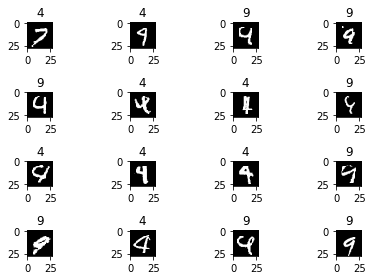

In [157]:
proba = clf_p2.predict_proba(testing_X)
wrong_set = find_the_hardest_set(proba, testing_y)
f, axarr = plt.subplots(4, 4)
plt.title("The top 16 hard examples classified by p2")
row = 0
col = 0
for i in range(16):
    axarr[row, col].imshow(testing_X[wrong_set[i][1]].reshape((28, 28)), cmap='gray')
    axarr[row, col].set_title('{label}'.format(label=int(testing_y[wrong_set[i][1]])))
    col += 1
    if col == 4:
        col = 0
        row += 1
plt.tight_layout()
plt.show()

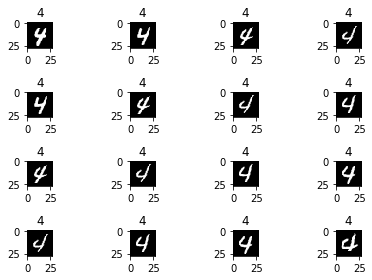

In [180]:
clf_rbf.fit(training_X, training_y)
proba = clf_rbf.predict_proba(testing_X)
wrong_set = find_the_hardest_set(proba, testing_y)
f, axarr = plt.subplots(4, 4)
plt.title("The top 16 hard examples classified by rbf")
for row in range(4):
    for col in range(4):
        axarr[row, col].imshow(testing_X[wrong_set[row+col][1]].reshape((28, 28)), cmap='gray')
        axarr[row, col].set_title('{label}'.format(label=int(testing_y[wrong_set[row+col][1]])))

plt.tight_layout()
plt.show()